In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
%%time
df=pd.read_csv("train.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32',
 'HasDetections': 'int32'})

Wall time: 2min 11s


In [4]:
df.memory_usage().sum()

2138157894

In [5]:
df.shape

(8921483, 83)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int32
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int32
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int32
CountryIdentifier                                    int32
CityIdentifier                      

In [7]:
for col in df.columns:
    print("Number of Unique values : "+str(col)+" :"+str(df[col].dtype),df[col].nunique())

Number of Unique values : MachineIdentifier :category 8921483
Number of Unique values : ProductName :category 6
Number of Unique values : EngineVersion :category 70
Number of Unique values : AppVersion :category 110
Number of Unique values : AvSigVersion :category 8531
Number of Unique values : IsBeta :int32 2
Number of Unique values : RtpStateBitfield :float16 7
Number of Unique values : IsSxsPassiveMode :int32 2
Number of Unique values : DefaultBrowsersIdentifier :float16 1730
Number of Unique values : AVProductStatesIdentifier :float32 28970
Number of Unique values : AVProductsInstalled :float16 8
Number of Unique values : AVProductsEnabled :float16 6
Number of Unique values : HasTpm :int32 2
Number of Unique values : CountryIdentifier :int32 222
Number of Unique values : CityIdentifier :float32 107366
Number of Unique values : OrganizationIdentifier :float16 49
Number of Unique values : GeoNameIdentifier :float16 292
Number of Unique values : LocaleEnglishNameIdentifier :int32 276


In [8]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].unique()

array([ 0.,  1., nan])

In [9]:
#df['IsBeta']=df['IsBeta'].astype('int8')
#df['HasDetections']=df['HasDetections'].astype('int8')
#df['HasTpm']=df['HasTpm'].astype('int8')
#df['IsProtected']=df['IsProtected'].astype('int8')
#df['AutoSampleOptIn']=df['AutoSampleOptIn'].astype('int8')
#df['SMode']=df['SMode'].astype('int8')
#df['Firewall']=df['Firewall'].astype('int8')
#df['Census_HasOpticalDiskDrive']=df['Census_HasOpticalDiskDrive'].astype('int8')
#df['Census_ThresholdOptIn']=df['Census_ThresholdOptIn'].astype('int8')
#df['Census_IsFlightingInternal']=df['Census_IsFlightingInternal'].astype('int8')
#df['Census_IsFlightsDisabled']=df['Census_IsFlightsDisabled'].astype('int8')
#df['Census_IsSecureBootEnabled']=df['Census_IsSecureBootEnabled'].astype('int8')
#df['Census_IsWIMBootEnabled']=df['Census_IsWIMBootEnabled'].astype('int8')
#df['Census_IsVirtualDevice']=df['Census_IsVirtualDevice'].astype('int8')
#df['Census_IsTouchEnabled']=df['Census_IsTouchEnabled'].astype('int8')
#df['Census_IsPenCapable']=df['Census_IsPenCapable'].astype('int8')
#df['Census_IsAlwaysOnAlwaysConnectedCapable']=df['Census_IsAlwaysOnAlwaysConnectedCapable'].astype('int8')
#df['Wdft_IsGamer']=df['Wdft_IsGamer'].astype('int8')

In [10]:
print("Number of Columns : ",len(df.columns))
print("Number of Rows : ",len(df))

Number of Columns :  83
Number of Rows :  8921483


In [11]:
l=df.columns[df.isnull().any()].tolist()

In [12]:
drop_list=[]
delete_rows_list=[]
treat_list=[]
for column in l:
    print("Number of Null Values for : "+str(column)+" "+str(df[column].isnull().sum())+" "+str(df[column].isnull().sum()*100/len(df))+"%")
    if df[column].isnull().sum()*100/len(df)>=60:#dropping columns with more than 60% of missing values
        drop_list.append(column)
    elif df[column].isnull().sum()*100/len(df)<=30:#Deleting rows having columns upto 30% missing values
        delete_rows_list.append(column)
    else:#Treating null values in the remainder of the columns
        treat_list.append(column)

Number of Null Values for : RtpStateBitfield 32318 0.3622491910817966%
Number of Null Values for : DefaultBrowsersIdentifier 8488045 95.14163732644%
Number of Null Values for : AVProductStatesIdentifier 36221 0.4059975230575455%
Number of Null Values for : AVProductsInstalled 36221 0.4059975230575455%
Number of Null Values for : AVProductsEnabled 36221 0.4059975230575455%
Number of Null Values for : CityIdentifier 325409 3.6474765462199503%
Number of Null Values for : OrganizationIdentifier 2751518 30.841486779720366%
Number of Null Values for : GeoNameIdentifier 213 0.0023874954421815296%
Number of Null Values for : OsBuildLab 21 0.00023538687458127757%
Number of Null Values for : IsProtected 36044 0.404013547971789%
Number of Null Values for : PuaMode 8919174 99.97411865269486%
Number of Null Values for : SMode 537759 6.0276862041882495%
Number of Null Values for : IeVerIdentifier 58894 0.6601368853137982%
Number of Null Values for : SmartScreen 3177011 35.610794752397105%
Number of 

In [13]:
drop_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [14]:
delete_rows_list

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedC

In [15]:
treat_list

['OrganizationIdentifier', 'SmartScreen']

In [16]:
df.drop(columns=drop_list,axis=1,inplace=True)

In [17]:
df.shape

(8921483, 76)

In [18]:
df.dropna(subset=delete_rows_list,axis=0,inplace=True)

In [19]:
df.shape

(7180589, 76)

In [20]:
df.OrganizationIdentifier.isnull().sum()

2211421

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


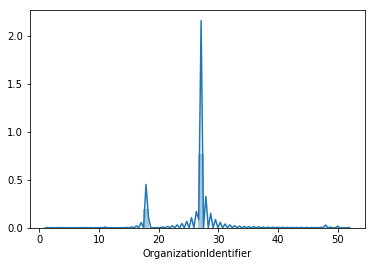

In [21]:
sns.distplot(df.OrganizationIdentifier.fillna(np.nanmedian(df['OrganizationIdentifier'])))

In [22]:
df.SmartScreen.isnull().sum()

2454929

In [23]:
import statistics

In [24]:
statistics.mode(df.SmartScreen)

'RequireAdmin'

In [25]:
df.SmartScreen.fillna(statistics.mode(df.SmartScreen),inplace=True)

In [26]:
df.OrganizationIdentifier.fillna(np.nanmedian(df.OrganizationIdentifier),inplace=True)

In [27]:
df.shape

(7180589, 76)

In [28]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [29]:
for col in df.columns:
    print("Number of unique values for : "+str(col)+" :",df[col].nunique())

Number of unique values for : MachineIdentifier : 7180589
Number of unique values for : ProductName : 4
Number of unique values for : EngineVersion : 60
Number of unique values for : AppVersion : 104
Number of unique values for : AvSigVersion : 7346
Number of unique values for : IsBeta : 2
Number of unique values for : RtpStateBitfield : 7
Number of unique values for : IsSxsPassiveMode : 2
Number of unique values for : AVProductStatesIdentifier : 23107
Number of unique values for : AVProductsInstalled : 6
Number of unique values for : AVProductsEnabled : 6
Number of unique values for : HasTpm : 2
Number of unique values for : CountryIdentifier : 222
Number of unique values for : CityIdentifier : 102099
Number of unique values for : OrganizationIdentifier : 49
Number of unique values for : GeoNameIdentifier : 290
Number of unique values for : LocaleEnglishNameIdentifier : 274
Number of unique values for : Platform : 3
Number of unique values for : Processor : 3
Number of unique values f

In [30]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [31]:
df.select_dtypes(include='int64').columns

Index([], dtype='object')

In [32]:
df.select_dtypes(include='float64').columns

Index([], dtype='object')

In [33]:
#df['OsBuild_new']=[1 if x in [17134,16299,15063,14393,10586,10240,9600,7601] else 0 for x in df['OsBuild']]

In [34]:
df.columns[1]

'ProductName'

In [35]:
df[df.columns[1]].nunique()

4

In [36]:
df[df.columns[1]].value_counts()

win8defender     7175886
mse                 4701
scep                   1
mseprerelease          1
fep                    0
windowsintune          0
Name: ProductName, dtype: int64

In [37]:
df['ProductName']=[1 if x=='win8defender' else 0 for x in df['ProductName']]

In [38]:
df.columns[2]

'EngineVersion'

In [39]:
df[df.columns[2]].nunique()

60

In [40]:
df[df.columns[2]].value_counts()

1.1.15200.1    3265106
1.1.15100.1    3221196
1.1.15000.2     232487
1.1.14901.4     185746
1.1.14800.3     118229
1.1.14700.5      40294
1.1.15300.6      35754
1.1.14600.4      22295
1.1.14104.0      12856
1.1.15300.5      12608
1.1.13504.0       7262
1.1.14500.5       3480
1.1.14405.2       3108
1.1.15000.1       2196
1.1.14306.0       2115
1.1.14901.3       1378
1.1.14003.0       1293
1.1.14202.0       1188
1.1.14700.3       1138
1.1.13303.0       1062
1.1.13407.0       1046
1.1.13804.0       1018
1.1.13903.0        981
1.1.14700.4        958
1.1.14800.1        837
1.1.13601.0        765
1.1.12902.0        624
1.1.13701.0        578
1.1.13704.0        539
1.1.13103.0        539
                ...   
1.1.13902.0         15
1.1.14002.0         13
1.1.12603.0          9
1.1.14001.0          8
1.1.13803.0          8
1.1.13802.0          7
1.1.12804.0          6
1.1.12706.0          5
1.1.11701.0          4
1.1.12505.0          4
1.1.12101.0          4
1.1.12002.0          2
1.1.13406.0

In [41]:
df['EngineVersion']=[1 if x in ['1.1.15200.1','1.1.15100.1','1.1.15000.2','1.1.14901.4','1.1.14800.3'] else 0 for x in df['EngineVersion']]

In [42]:
df.columns[3]

df[df.columns[3]].nunique()

df[df.columns[3]].value_counts()

4.18.1807.18075     4531382
4.18.1806.18062      767433
4.16.17656.18052     215114
4.12.16299.15        214262
4.14.17639.18041     177239
4.8.10240.17443      172548
4.9.10586.1106       165884
4.13.17134.228       148098
4.13.17134.1         146070
4.10.209.0            95308
4.12.17007.18022      87389
4.14.17613.18039      48239
4.11.15063.447        42733
4.9.10586.0           40994
4.12.17007.18011      38668
4.8.10240.16384       36354
4.11.15063.0          32538
4.10.14393.0          29370
4.10.14393.1794       25328
4.11.15063.1155       20906
4.9.10586.672         15188
4.13.17134.191        14388
4.10.14393.1198       12358
4.9.10586.494          8576
4.12.17007.17123       8536
4.9.10586.1045         7922
4.13.17134.112         7541
4.10.14393.1613        7417
4.9.10586.589          7268
4.10.14393.1593        5169
                     ...   
4.18.1806.20033          18
4.18.1806.20015          18
4.9.10586.1177           16
4.15.17650.1001          12
4.10.205.0          

In [43]:
print(df.columns[4])

print(df[df.columns[4]].nunique())

AvSigVersion
7346


In [44]:
df[df.columns[4]].value_counts()

1.273.1420.0    90348
1.275.1140.0    83419
1.275.727.0     79107
1.273.371.0     74424
1.273.1826.0    72090
1.275.1244.0    66375
1.273.810.0     57298
1.273.1749.0    54409
1.275.1209.0    53035
1.273.1379.0    42917
1.273.1005.0    42796
1.273.894.0     40149
1.273.781.0     39021
1.273.1527.0    36484
1.273.337.0     34009
1.273.717.0     33542
1.273.461.0     33422
1.273.1167.0    32301
1.273.950.0     31441
1.275.948.0     31420
1.273.1034.0    30165
1.275.1293.0    29771
1.273.1112.0    28641
1.275.1025.0    27804
1.273.1311.0    27484
1.275.511.0     27084
1.273.1056.0    26184
1.273.1795.0    26069
1.273.665.0     25864
1.275.112.0     25828
                ...  
1.225.1119.0        0
1.253.488.0         0
1.235.2103.0        0
1.231.199.0         0
1.229.804.0         0
1.193.418.0         0
1.249.146.0         0
1.227.2306.0        0
1.235.1343.0        0
1.227.466.0         0
1.225.24.0          0
1.225.3482.0        0
1.225.2852.0        0
1.233.1958.0        0
1.229.737.

In [45]:
#drop IsBeta

In [46]:
df.columns[6]

'RtpStateBitfield'

In [47]:
df[df.columns[6]].value_counts()

7.0     6989518
0.0      155547
5.0       17183
8.0       15042
3.0        2016
1.0        1262
35.0         21
Name: RtpStateBitfield, dtype: int64

In [48]:
df['RtpStateBitfield']=[1 if x in [7.0,0.0,5.0,8.0] else 0 for x in df['RtpStateBitfield']]

In [49]:
df[df.columns[7]].value_counts()

0    7050172
1     130417
Name: IsSxsPassiveMode, dtype: int64

In [50]:
df.columns[8]

'AVProductStatesIdentifier'

In [51]:
df[df.columns[8]].value_counts()

53447.0    4791489
7945.0      388790
47238.0     291730
62773.0     177005
46413.0      99412
49480.0      87739
23657.0      86312
41571.0      81389
51954.0      59700
46669.0      39000
22728.0      38325
43856.0      36647
43927.0      36325
3371.0       32986
6630.0       30127
68585.0      23306
40431.0      21476
24213.0      19096
61343.0      17830
56914.0      17760
63682.0      15708
11280.0      15617
48510.0      15313
12202.0      14865
44141.0      12737
40535.0      11750
23141.0      11241
61100.0      10956
50397.0      10434
43581.0      10047
            ...   
41701.0          1
41764.0          1
41749.0          1
41747.0          1
41730.0          1
41729.0          1
41727.0          1
41726.0          1
41725.0          1
41722.0          1
41721.0          1
41712.0          1
41709.0          1
41703.0          1
41699.0          1
41579.0          1
41697.0          1
41689.0          1
41679.0          1
41665.0          1
41664.0          1
41641.0     

In [52]:
df.columns[9]

'AVProductsInstalled'

In [53]:
df[df.columns[9]].value_counts()

1.0    4998432
2.0    2008074
3.0     167011
4.0       6711
5.0        344
6.0         17
Name: AVProductsInstalled, dtype: int64

In [54]:
df['AVProductsInstalled']=[1 if x in [1.0,2.0,3.0] else 0 for x in df['AVProductsInstalled']]

In [55]:
df['AVProductsInstalled'].value_counts()

1    7173517
0       7072
Name: AVProductsInstalled, dtype: int64

In [56]:
df.columns[10]

'AVProductsEnabled'

In [57]:
df[df.columns[10]].value_counts()

1.0    7022347
2.0     137040
0.0      16796
3.0       4074
4.0        320
5.0         12
Name: AVProductsEnabled, dtype: int64

In [58]:
df['AVProductsEnabled']=[1 if x in [1.0,2.0,3.0,4.0,5.0] else 0 for x in df['AVProductsEnabled']]

In [59]:
df.AVProductsEnabled.value_counts()

1    7163793
0      16796
Name: AVProductsEnabled, dtype: int64

In [60]:
df.columns[11]

'HasTpm'

In [61]:
df[df.columns[11]].value_counts()

1    7169869
0      10720
Name: HasTpm, dtype: int64

In [62]:
df.columns[12]

'CountryIdentifier'

In [63]:
df[df.columns[12]].value_counts()

43     307759
29     278752
141    268339
93     234500
171    220108
60     189509
201    181724
207    170783
89     167577
66     165749
97     157729
214    156605
158    146246
9      140114
41     137873
68     133562
44     132372
51     129396
203    126357
107    124501
35     115794
142    111946
195    109269
149    106888
160    105044
205     93912
164     88964
173     79782
159     77493
155     75197
        ...  
192       664
182       614
123       586
196       547
134       547
75        540
114       519
126       500
198       499
197       483
28        465
215       437
5         431
14        402
105       397
187       358
216       319
200       301
174       292
79        286
10        285
64        275
212       262
128       222
161       187
165       177
193       157
37        151
186       115
217       108
Name: CountryIdentifier, Length: 222, dtype: int64

In [64]:
df.columns[13]

'CityIdentifier'

In [65]:
df[df.columns[13]].value_counts()

130775.0    81613
16668.0     70634
82373.0     68279
10222.0     61351
61668.0     55844
66202.0     54335
143782.0    53940
58607.0     49916
66953.0     48556
92213.0     46534
22656.0     43652
136271.0    42562
96401.0     39480
74924.0     37852
39800.0     32138
37376.0     30392
20805.0     30160
143155.0    29881
67513.0     29010
20710.0     28229
159247.0    26930
56441.0     26899
87401.0     26873
75528.0     25463
90994.0     25328
77794.0     24339
5433.0      24334
86819.0     24286
13354.0     24079
133897.0    23660
            ...  
167565.0        1
167509.0        1
167533.0        1
41984.0         1
41983.0         1
41979.0         1
114962.0        1
41977.0         1
41975.0         1
41972.0         1
41958.0         1
167524.0        1
167526.0        1
167529.0        1
41956.0         1
41953.0         1
41942.0         1
114961.0        1
167538.0        1
167539.0        1
167542.0        1
95747.0         1
114954.0        1
167549.0        1
167550.0  

In [66]:
df.columns[14]

'OrganizationIdentifier'

In [67]:
df[df.columns[14]].value_counts()

27.0    5599093
18.0    1414715
48.0      50747
50.0      37074
37.0      15204
11.0      14398
49.0      11278
46.0       9038
14.0       3860
36.0       3266
32.0       3035
52.0       2528
33.0       2344
2.0        1954
5.0        1641
40.0       1364
28.0       1207
4.0        1072
10.0        892
51.0        737
20.0        728
1.0         692
8.0         559
39.0        340
47.0        329
6.0         324
22.0        289
31.0        278
3.0         268
16.0        208
21.0        164
19.0        149
26.0        129
44.0        122
29.0        105
42.0        103
7.0          78
41.0         58
30.0         52
45.0         49
43.0         46
35.0         29
23.0         13
15.0         11
25.0          9
12.0          6
34.0          2
38.0          1
17.0          1
Name: OrganizationIdentifier, dtype: int64

In [68]:
df['OrganizationIdentifier']=[1 if x in [27.0,18.0,48.0] else 0 for x in df['OrganizationIdentifier']]

In [69]:
df.columns[15]

'GeoNameIdentifier'

In [70]:
df[df.columns[15]].nunique()

290

In [71]:
df.columns[16]

'LocaleEnglishNameIdentifier'

In [72]:
df[df.columns[16]].value_counts()
df['LocaleEnglishNameIdentifier']=[1 if x in [75,182,74,42,88,171,233,227,251,124,103,64,46,134,217,214,218,170] else 0 for x in df['LocaleEnglishNameIdentifier']]

In [73]:
df.LocaleEnglishNameIdentifier.value_counts()

1    5144782
0    2035807
Name: LocaleEnglishNameIdentifier, dtype: int64

In [74]:
df.columns[17]

'Platform'

In [75]:
df[df.columns[17]].value_counts()

windows10      7084153
windows8         91900
windows7          4536
windows2016          0
Name: Platform, dtype: int64

In [76]:
df['Platform']=[1 if x in ['windows10','windows8'] else 0 for x in df['Platform']]

In [77]:
df.columns[18]

'Processor'

In [78]:
df[df.columns[18]].value_counts()

x64      6561772
x86       618524
arm64        293
Name: Processor, dtype: int64

In [79]:
df.columns[19]

'OsVer'

In [80]:
df[df.columns[19]].nunique()

44

In [81]:
df[df.columns[19]].value_counts()
df['OsVer']=[1 if x in ['10.0.0.0','6.3.0.0'] else 0 for x in df['OsVer']]

In [82]:
df.columns[20]

'OsBuild'

In [83]:
df[df.columns[20]].value_counts()
df['OsBuild']=[1 if x in [17134,16299,15063,14393,10586,10240] else 0 for x in df['OsBuild']]

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
cols=df.columns

In [86]:
categorical_cols=df.select_dtypes(include='category').columns

In [87]:
categorical_cols

Index(['MachineIdentifier', 'AppVersion', 'AvSigVersion', 'Processor',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSVersion',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')

In [88]:
l=[]
for col in cols:
    if col in categorical_cols:
        continue
    else:
        l.append(col)

In [89]:
for col in l:
    print("Number of unique values : "+str(col)+" :",df[col].nunique())

Number of unique values : ProductName : 2
Number of unique values : EngineVersion : 2
Number of unique values : IsBeta : 2
Number of unique values : RtpStateBitfield : 2
Number of unique values : IsSxsPassiveMode : 2
Number of unique values : AVProductStatesIdentifier : 23107
Number of unique values : AVProductsInstalled : 2
Number of unique values : AVProductsEnabled : 2
Number of unique values : HasTpm : 2
Number of unique values : CountryIdentifier : 222
Number of unique values : CityIdentifier : 102099
Number of unique values : OrganizationIdentifier : 2
Number of unique values : GeoNameIdentifier : 290
Number of unique values : LocaleEnglishNameIdentifier : 2
Number of unique values : Platform : 2
Number of unique values : OsVer : 2
Number of unique values : OsBuild : 2
Number of unique values : OsSuite : 4
Number of unique values : IsProtected : 2
Number of unique values : AutoSampleOptIn : 2
Number of unique values : SMode : 2
Number of unique values : IeVerIdentifier : 207
Numb

In [90]:
#df['IsBeta']=df['IsBeta'].astype('category')
#df['HasTpm']=df['HasTpm'].astype('category')
#df['AVProductStatesIdentifier']=df['AVProductStatesIdentifier'].astype('category')
#df['CountryIdentifier']=df['CountryIdentifier'].astype('category')
#df['CityIdentifier']=df['CityIdentifier'].astype('category')
#df['OrganizationIdentifier']=df['OrganizationIdentifier'].astype('category')
#df['GeoNameIdentifier']=df['GeoNameIdentifier'].astype('category')
#df['LocaleEnglishNameIdentifier']=df['LocaleEnglishNameIdentifier'].astype('category')
#df['OsBuild']=df['OsBuild'].astype('category')
#df['OsSuite']=df['OsSuite'].astype('category')
#df['IsProtected']=df['IsProtected'].astype('category')
#df['AutoSampleOptIn']=df['AutoSampleOptIn'].astype('category')
#df['SMode']=df['SMode'].astype('category')
#df['Firewall']=df['Firewall'].astype('category')
#df['UacLuaenable']=df['UacLuaenable'].astype('category')
#df['Census_ProcessorManufacturerIdentifier']=df['Census_ProcessorManufacturerIdentifier'].astype('category')
#df['Census_HasOpticalDiskDrive']=df['Census_HasOpticalDiskDrive'].astype('category')
#df['Census_OSBuildNumber']=df['Census_OSBuildNumber'].astype('category')
#df['Census_OSInstallLanguageIdentifier']=df['Census_OSInstallLanguageIdentifier'].astype('category')
#df['Census_IsFlightsDisabled']=df['Census_IsFlightsDisabled'].astype('category')
#df['Census_IsPenCapable']=df['Census_IsPenCapable'].astype('category')
#df['Census_IsVirtualDevice']=df['Census_IsVirtualDevice'].astype('category')
#df['Census_IsPortableOperatingSystem']=df['Census_IsPortableOperatingSystem'].astype('category')
#df['Census_IsTouchEnabled']=df['Census_IsTouchEnabled'].astype('category')
#df['Wdft_IsGamer']=df['Wdft_IsGamer'].astype('category')
#df['Wdft_RegionIdentifier']=df['Wdft_RegionIdentifier'].astype('category')
#df['HasDetections']=df['HasDetections'].astype('category')


In [91]:
corr1=df[df.select_dtypes(include =['float16','float32','int32','int64']).columns].corr()

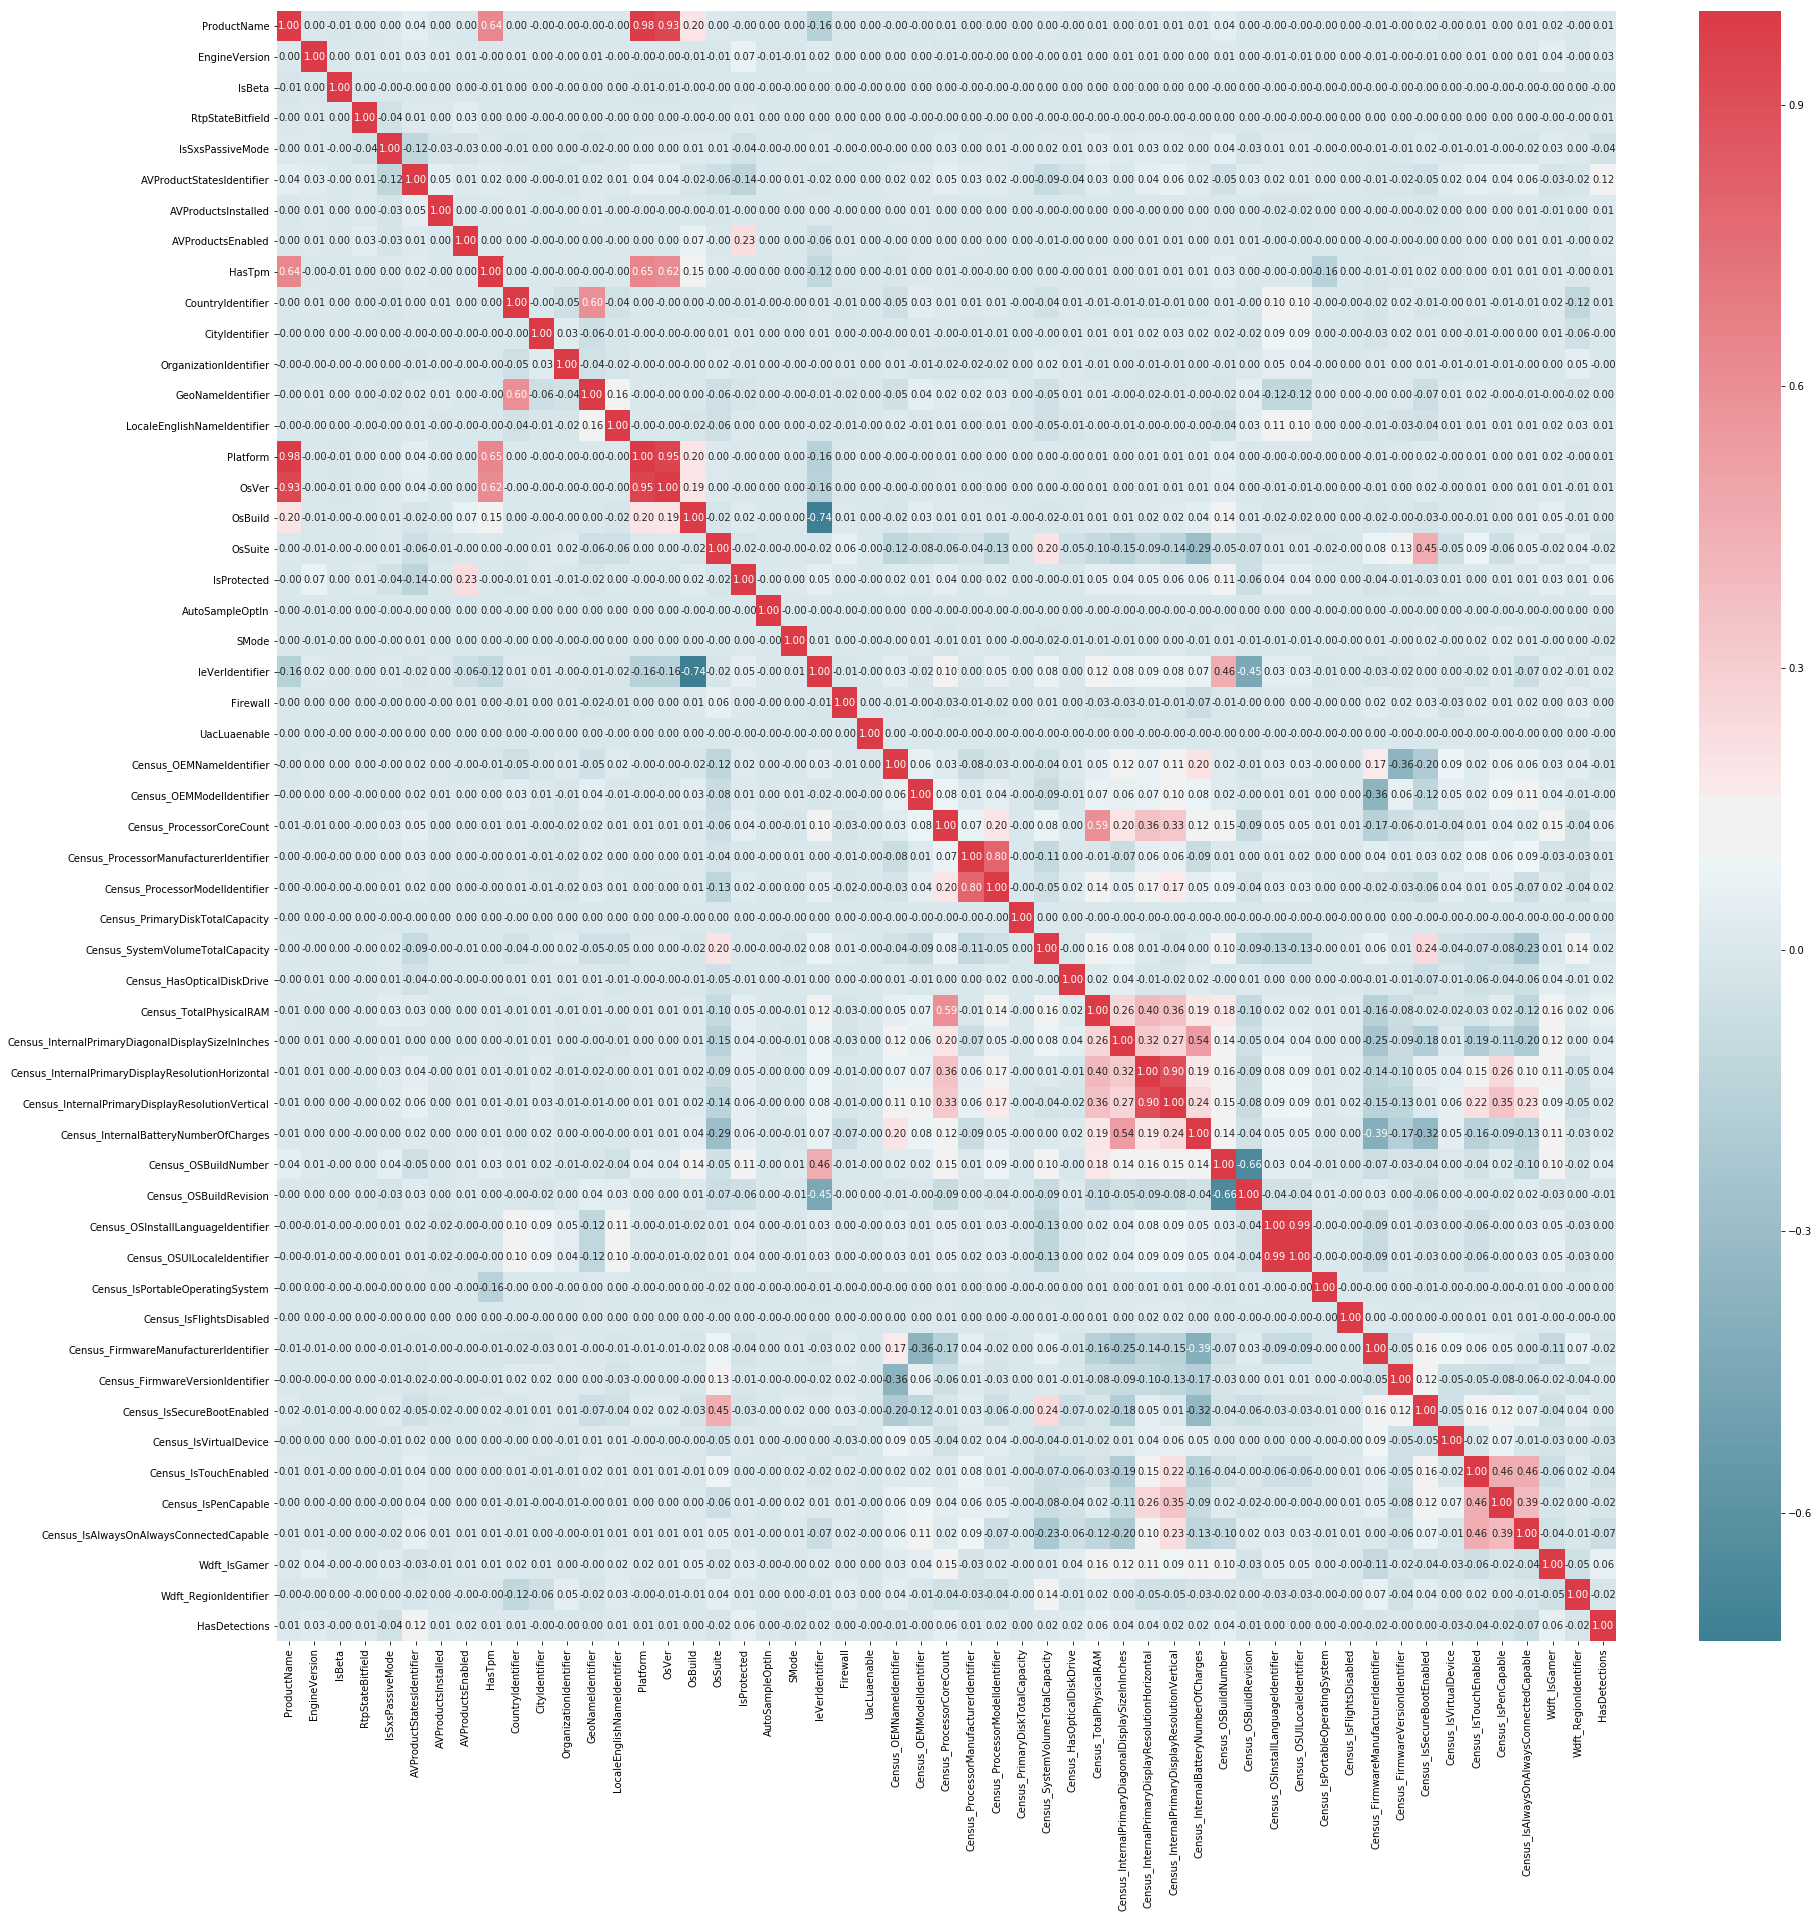

In [92]:
fig, ax = plt.subplots(figsize=(30,30))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, cmap=colormap, annot=True, fmt=".2f")#

In [93]:
#fig.savefig("correlation.jpg")

In [94]:
#df.drop(columns=['IsSxsPassiveMode','AVProductStatesIdentifier','CountryIdentifier','Census_OSBuildNumber','Census_OSBuildRevision','Census_IsSecureBootEnabled','Census_ProcessorCoreCount','Census_ProcessorModelIdentifier','Census_InternalBatteryNumberOfCharges','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable'],inplace=True)

In [95]:
#correlated_cols=['IsSxsPassiveMode','AVProductStatesIdentifier','CountryIdentifier','Census_OSBuildNumber','Census_OSBuildRevision','Census_IsSecureBootEnabled','Census_ProcessorCoreCount','Census_ProcessorModelIdentifier','Census_InternalBatteryNumberOfCharges','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable']

In [96]:
categorical_cols=df.select_dtypes(include='category').columns.tolist()

In [97]:
categorical_cols=categorical_cols[1:]

In [98]:
len(categorical_cols)

22

In [99]:
f=[]
for col in categorical_cols:
    print("Number of Unique Value : "+str(col)+" :",df[col].nunique())
    if df[col].nunique()>30:
        f.append(col)        

Number of Unique Value : AppVersion : 104
Number of Unique Value : AvSigVersion : 7346
Number of Unique Value : Processor : 3
Number of Unique Value : OsPlatformSubRelease : 9
Number of Unique Value : OsBuildLab : 537
Number of Unique Value : SkuEdition : 7
Number of Unique Value : SmartScreen : 20
Number of Unique Value : Census_MDC2FormFactor : 12
Number of Unique Value : Census_DeviceFamily : 3
Number of Unique Value : Census_PrimaryDiskTypeName : 4
Number of Unique Value : Census_ChassisTypeName : 46
Number of Unique Value : Census_PowerPlatformRoleName : 9
Number of Unique Value : Census_OSVersion : 415
Number of Unique Value : Census_OSArchitecture : 3
Number of Unique Value : Census_OSBranch : 24
Number of Unique Value : Census_OSEdition : 28
Number of Unique Value : Census_OSSkuName : 25
Number of Unique Value : Census_OSInstallTypeName : 9
Number of Unique Value : Census_OSWUAutoUpdateOptionsName : 5
Number of Unique Value : Census_GenuineStateName : 4
Number of Unique Value :

In [100]:
df.shape

(7180589, 76)

In [101]:
f

['AppVersion',
 'AvSigVersion',
 'OsBuildLab',
 'Census_ChassisTypeName',
 'Census_OSVersion']

In [102]:
#for col in categorical_cols:
#    if col in f:
#        continue
#    elif df[col].nunique()==2:
#        continue
#    else:
#        df=pd.get_dummies(data=df,columns=[col])

In [103]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1,1,4.18.1807.18075,1.273.1735.0,0,1,0,53447.0,1,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1,0,4.13.17134.1,1.263.48.0,0,1,0,53447.0,1,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1,1,4.18.1807.18075,1.273.1341.0,0,1,0,53447.0,1,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1,1,4.18.1807.18075,1.273.1527.0,0,1,0,53447.0,1,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1,1,4.18.1807.18075,1.273.1379.0,0,1,0,53447.0,1,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


In [104]:
df.shape

(7180589, 76)

In [105]:
from sklearn.preprocessing import LabelEncoder
le = {}
for col in categorical_cols:
    le[col] = LabelEncoder()
    df.loc[:,col] = le[col].fit_transform(df.loc[:,col])


In [106]:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,auc,precision_score,recall_score,roc_auc_score

In [107]:
l=[]
for col in df.columns:
    if col=='HasDetections':
        continue
    else:
        l.append(col)
l=l+list(['HasDetections'])

In [108]:
df=df[l]

In [109]:
#df.to_csv("mydataframe.csv",index=False)

In [110]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1,1,59,6615,0,1,0,53447.0,1,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1,0,26,5121,0,1,0,53447.0,1,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1,1,59,6486,0,1,0,53447.0,1,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1,1,59,6537,0,1,0,53447.0,1,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1,1,59,6496,0,1,0,53447.0,1,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


In [111]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [112]:
#df=""

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
#X['Interactions_ProductName_EngineVersion_AppVersion']=X['ProductName']*X['EngineVersion']*X['AppVersion']

In [115]:
#X['Interactions_AVProductsEnabled_AVProductsInstalled']=X['AVProductsEnabled']*X['AVProductsInstalled']

In [116]:
#from sklearn.preprocessing import PolynomialFeatures

In [117]:
%%time
#p=PolynomialFeatures(degree=2,include_bias=False).fit(X)
#features = pd.DataFrame(data=p.transform(X), columns=p.get_feature_names(X.columns))

Wall time: 0 ns


In [118]:
#r

In [119]:
#

In [120]:
#%%time
#

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
%%time
#from xgboost import XGBClassifier
#xgb=XGBClassifier(learning_rate=0.1,n_estimators=80,random_state=42,silent=False,max_depth=8)
#xgb.fit(X_train,y_train)

Wall time: 0 ns


In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
%%time
gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=6,n_estimators=20,random_state=42,verbose=True)
gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3664           40.49m
         2           1.3503           38.33m
         3           1.3368           36.07m
         4           1.3253           34.09m
         5           1.3151           32.08m
         6           1.3067           29.99m
         7           1.2995           27.89m
         8           1.2931           25.81m
         9           1.2880           24.07m
        10           1.2834           22.07m
        20           1.2589            0.00s
Wall time: 55min 25s


In [126]:
predictions=gb.predict(X_test)
prediction_scores=gb.predict_proba(X_test)
scores=[]
for score in prediction_scores:
    scores.append(score[1])


In [127]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
#print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.6365751282276247
Precision :  0.6338359127629599
Recall :  0.6713460471909989
ROC AUC score :  0.6964772176532056


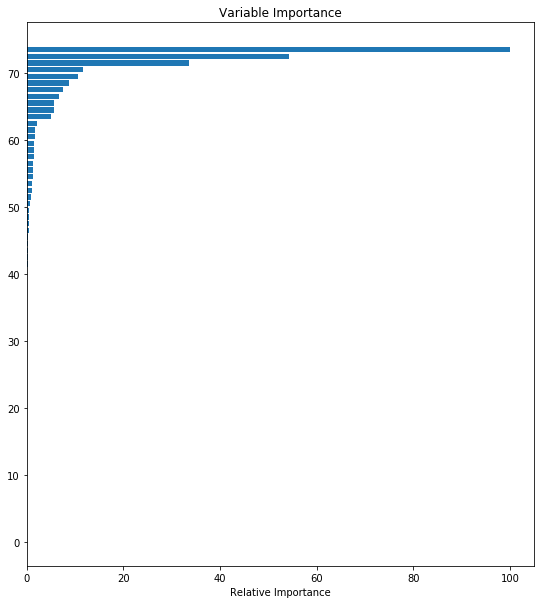

In [128]:
feature_importance=gb.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx3 = np.argsort(feature_importance)

pos = np.arange(sorted_idx3.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx3], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [129]:
len(X.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))])

53

In [130]:
X.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))]

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       '

In [131]:
#X=X.iloc[:,20:]

In [132]:
#from sklearn.preprocessing import PolynomialFeatures

In [133]:
#p=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True).fit(X)

In [134]:
#X=pd.DataFrame(data=p.transform(X),columns=p.get_feature_names(X.columns))

In [135]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [136]:
#xgb=XGBClassifier(learning_rate=0.1,n_estimators=100,random_state=42,silent=False)

In [137]:
%%time
df_test=pd.read_csv("test.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32'})

Wall time: 4min 25s


In [138]:
solution=pd.DataFrame()

In [139]:
solution['MachineIdentifier']=df_test['MachineIdentifier']

In [140]:
df_test=df_test[X.columns.tolist()]

In [141]:
df_test['ProductName']=[1 if x=='win8defender' else 0 for x in df_test['ProductName']]
df_test['EngineVersion']=[1 if x in ['1.1.15200.1','1.1.15100.1','1.1.15000.2','1.1.14901.4','1.1.14800.3'] else 0 for x in df_test['EngineVersion']]
df_test['RtpStateBitfield']=[1 if x in [7.0,0.0,5.0,8.0] else 0 for x in df_test['RtpStateBitfield']]
df_test['AVProductsInstalled']=[1 if x in [1.0,2.0,3.0] else 0 for x in df_test['AVProductsInstalled']]
df_test['AVProductsEnabled']=[1 if x in [1.0,2.0,3.0,4.0,5.0] else 0 for x in df_test['AVProductsEnabled']]
df_test['OrganizationIdentifier']=[1 if x in [27.0,18.0,48.0] else 0 for x in df_test['OrganizationIdentifier']]
df_test['LocaleEnglishNameIdentifier']=[1 if x in [75,182,74,42,88,171,233,227,251,124,103,64,46,134,217,214,218,170] else 0 for x in df_test['LocaleEnglishNameIdentifier']]
df_test['Platform']=[1 if x in ['windows10','windows8'] else 0 for x in df_test['Platform']]
df_test['OsVer']=[1 if x in ['10.0.0.0','6.3.0.0'] else 0 for x in df_test['OsVer']]
df_test['OsBuild']=[1 if x in [17134,16299,15063,14393,10586,10240] else 0 for x in df_test['OsBuild']]



In [142]:
df_test.shape

(7853253, 74)

In [143]:
#df_test.fillna?

In [144]:
import statistics

In [145]:
statistics.mode(le[categorical_cols[0]].inverse_transform(df.loc[:,categorical_cols[0]]))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'4.18.1807.18075'

In [146]:
categorical_cols

['AppVersion',
 'AvSigVersion',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [147]:
%%time
for col in df_test.columns[df_test.isnull().any()]:
    if col in categorical_cols:
        df_test[col].fillna(statistics.mode(le[col].inverse_transform(X.loc[:,col])),inplace=True)
        #print("Mode for column : "+str(col),statistics.mode(le[col].inverse_transform(X.loc[:,col])))
    else:
        df_test[col].fillna(statistics.mode(X[col]),inplace=True)
        #print("Mode for column : "+str(col),statistics.mode(X[col]))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

Wall time: 1min 19s


In [148]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [149]:
%%time
for col in categorical_cols:
    df_test[col]=le[col].fit_transform(df_test[col])

Wall time: 3min 55s


In [150]:
#df_test=pd.get_dummies(data=df_test,columns=['Wdft_RegionIdentifier','OsPlatformSubRelease','UacLuaenable'])

In [151]:
#xgboost_important_columns=dummy_x.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))].tolist()

In [152]:
df_test.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,1,0,70,9261,0,1,0,53447.0,1,1,...,7,807.0,8554.0,1,0.0,0,0,0.0,0.0,7.0
1,1,0,64,9005,0,1,0,53447.0,1,1,...,7,554.0,33105.0,1,0.0,0,0,0.0,1.0,12.0
2,1,0,64,8501,0,1,0,49480.0,1,1,...,7,556.0,63396.0,1,0.0,0,0,0.0,1.0,11.0
3,1,0,70,9301,0,1,0,42160.0,1,1,...,7,628.0,26320.0,1,0.0,0,0,0.0,0.0,10.0
4,1,0,64,8989,0,1,0,53447.0,1,1,...,7,556.0,63269.0,1,0.0,0,0,0.0,1.0,3.0


In [153]:
solution['HasDetections']=0

In [154]:
%%time
solution['HasDetections']=gb.predict_proba(df_test)

Wall time: 23 s


In [155]:
#df_test[dummy_X_train.columns]

In [156]:
%%time
solution.to_csv("EDA_v9_solution_2.csv",index=False)

Wall time: 55.8 s


In [157]:
solution.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.478937
1,00000176ac758d54827acd545b6315a5,0.404791
2,0000019dcefc128c2d4387c1273dae1d,0.545009
3,0000055553dc51b1295785415f1a224d,0.652912
4,00000574cefffeca83ec8adf9285b2bf,0.468700


In [158]:
len(solution)

7853253

In [159]:
import gc

In [160]:
gc.collect()

182

In [162]:
df.memory_usage().sum()

3293512962

In [163]:
del df

In [164]:
gc.collect()

7